In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Reviews.csv')[['Score', 'Text']]
df = df.sample(frac=.5)
df = df.reset_index()

In [3]:
print(len(df))
df.head(5)

284227


,index,Score,Text
0,254845,5,I sampled Green Mountain's pumpkin spice coffe...
1,185206,5,"My dog refuses to let me brush her teeth, even..."
2,73691,5,"Its a great K-cup holder, doesn't take up a lo..."
3,434812,5,"For me, this is just like drinking a grape sod..."
4,344409,5,Kids love these and it's a nice alternative to...


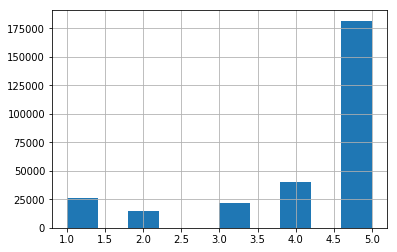

In [5]:
import matplotlib.pyplot as plt

df.Score.hist()

In [6]:
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer

output_dim = 1024
ngram_range = (1,3)

vectorizer = HashingVectorizer(n_features=output_dim, ngram_range=ngram_range, analyzer="char")

In [8]:
embedded_feature_col = vectorizer.transform(df.Text).astype(np.float32)

In [9]:
data = pd.SparseDataFrame(embedded_feature_col).to_dense().fillna(0)

In [10]:
data['Score'] = df['Score']

In [11]:
data['Score'].value_counts(dropna=False)

5    181581
4     40207
1     26140
3     21442
2     14857
Name: Score, dtype: int64

In [12]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Score
0,0.024193,-0.006048,0.0,0.0,0.0,0.000000,-0.006048,0.0,-0.006048,0.0,...,0.000000,0.0,0.00000,0.012097,0.012097,-0.006048,0.000000,0.006048,-0.006048,5
1,0.012640,-0.025280,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,-0.012640,0.025280,0.000000,0.000000,0.000000,0.000000,5
2,0.029981,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.014991,0.000000,0.014991,0.014991,-0.029981,5
3,0.109109,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,-0.018185,0.0,0.03637,0.000000,0.000000,0.000000,0.000000,0.018185,0.018185,5
4,0.015405,0.000000,0.0,0.0,0.0,0.015405,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.015405,0.000000,0.000000,0.000000,-0.030809,5


In [13]:
data.to_csv('./reviews_embedded.csv', index=False)